In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/felipe/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
DATASET_PATH = '/home/felipe/Dropbox/USP/MAC6967/Data/IHME-GBD_2017_DATA-e3390645-1.csv'
data = pd.read_csv(DATASET_PATH)

Vamos verificar como os dados estão dispostos no arquivo csv obtido.

In [3]:
data.head()

measure_id                        measure_name  location_id location_name  \
0           3  YLDs (Years Lived with Disability)         4750          Acre   
1           3  YLDs (Years Lived with Disability)         4750          Acre   
2           3  YLDs (Years Lived with Disability)         4750          Acre   
3           3  YLDs (Years Lived with Disability)         4753         Amapá   
4           3  YLDs (Years Lived with Disability)         4753         Amapá   

   sex_id sex_name  age_id  age_name  cause_id                cause_name  \
0       3     Both      22  All Ages       542    Neurological disorders   
1       3     Both      22  All Ages       542    Neurological disorders   
2       3     Both      22  All Ages       542    Neurological disorders   
3       3     Both      22  All Ages       641  Congenital birth defects   
4       3     Both      22  All Ages       641  Congenital birth defects   

   rei_id                 rei_name  metric_id metric_name  year       val  \
0     194  Guillain-Barré syndrome          1      Number  1990  0.383893   
1     194  Guillain-Barré syndrome          2     Percent  1990  0.000095   
2     194  Guillain-Barré syndrome          3        Rate  1990  0.092233   
3     196            Heart failure          1      Number  1991  2.571310   
4     196            Heart failure          2     Percent  1991  0.005415   

      upper     lower  
0  0.616773  0.204037  
1  0.000151  0.000055  
2  0.148184  0.049021  
3  3.957014  1.558093  
4  0.007428  0.003819

<h3>Quais dados são categóricos e quais são numéricos?</h3>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     13608 non-null  int64  
 1   measure_name   13608 non-null  object 
 2   location_id    13608 non-null  int64  
 3   location_name  13608 non-null  object 
 4   sex_id         13608 non-null  int64  
 5   sex_name       13608 non-null  object 
 6   age_id         13608 non-null  int64  
 7   age_name       13608 non-null  object 
 8   cause_id       13608 non-null  int64  
 9   cause_name     13608 non-null  object 
 10  rei_id         13608 non-null  int64  
 11  rei_name       13608 non-null  object 
 12  metric_id      13608 non-null  int64  
 13  metric_name    13608 non-null  object 
 14  year           13608 non-null  int64  
 15  val            13608 non-null  float64
 16  upper          13608 non-null  float64
 17  lower          13608 non-null  float64
dtypes: flo

In [5]:
data.describe()

measure_id   location_id   sex_id   age_id      cause_id        rei_id  \
count     13608.0  13608.000000  13608.0  13608.0  13608.000000  13608.000000   
mean          3.0   4763.000000      3.0     22.0    569.166667    194.666667   
std           0.0      7.789167      0.0      0.0    192.843300      1.490767   
min           3.0   4750.000000      3.0     22.0    298.000000    192.000000   
25%           3.0   4756.000000      3.0     22.0    491.000000    194.000000   
50%           3.0   4763.000000      3.0     22.0    525.000000    195.000000   
75%           3.0   4770.000000      3.0     22.0    641.000000    196.000000   
max           3.0   4776.000000      3.0     22.0    935.000000    196.000000   

          metric_id          year           val         upper         lower  
count  13608.000000  13608.000000  13608.000000  13608.000000  13608.000000  
mean       2.000000   2003.500000    321.266705    429.197617    224.685744  
std        0.816527      8.078044   1483.572356   1957.070134   1047.128484  
min        1.000000   1990.000000      0.000000      0.000000      0.000000  
25%        1.000000   1996.750000      0.013017      0.032935      0.004802  
50%        2.000000   2003.500000      0.426850      0.668596      0.248791  
75%        3.000000   2010.250000     28.231158     38.516959     19.532860  
max        3.000000   2017.000000  27997.619964  35365.545431  19876.803899

<h3>Medidas de tendência central dos anos vividos com deficiência no Brasil</h3>

As medidas são realizadas utlizando-se as diferentes métricas disponíveis no conjunto de dados.

In [6]:
data[data['metric_name'] == 'Number']['val'].describe()

count     4536.000000
mean       951.806937
std       2450.932732
min          0.000000
25%          2.357274
50%         47.189865
75%        716.832608
max      27997.619964
Name: val, dtype: float64

In [7]:
data[data['metric_name'] == 'Percent']['val'].describe()

count    4536.000000
mean        0.070600
std         0.078083
min         0.000000
25%         0.000073
50%         0.048881
75%         0.119194
max         0.298311
Name: val, dtype: float64

In [8]:
data[data['metric_name'] == 'Rate']['val'].describe()

count    4536.000000
mean       11.922577
std        16.940430
min         0.000000
25%         0.066874
50%         0.890115
75%        23.995462
max       106.287565
Name: val, dtype: float64

Nessas estatísticas podemos observar um desvio padrão de 2450.932732, o que caracteriza uma grande distância para uma média de 951.806937. A razão para tal distância provavelmente está ligada à quantidade de ocorrências que se tem nos grandes centros das grandes cidades em comparação as pequenas cidades.

In [9]:
# Skewness of preTestScore values
print()
print(data[data['metric_name'] == 'Number']['val'].skew())

# Kurtosis of preTestScore values
print()
print(data[data['metric_name'] == 'Number']['val'].kurt())

# Correlation Matrix Of Values
print()
print(data.corr())

# Covariance Matrix Of Values
print()
print(data.cov())


4.964235718424304

32.49315192633497

             measure_id   location_id  sex_id  age_id      cause_id  \
measure_id          NaN           NaN     NaN     NaN           NaN   
location_id         NaN  1.000000e+00     NaN     NaN  4.282949e-18   
sex_id              NaN           NaN     NaN     NaN           NaN   
age_id              NaN           NaN     NaN     NaN           NaN   
cause_id            NaN  4.282949e-18     NaN     NaN  1.000000e+00   
rei_id              NaN  7.734915e-18     NaN     NaN  2.361654e-01   
metric_id           NaN  0.000000e+00     NaN     NaN  0.000000e+00   
year                NaN  0.000000e+00     NaN     NaN -5.098947e-17   
val                 NaN  8.336442e-02     NaN     NaN -9.096838e-02   
upper               NaN  8.588080e-02     NaN     NaN -9.532889e-02   
lower               NaN  8.078495e-02     NaN     NaN -8.750466e-02   

                   rei_id  metric_id          year       val     upper  \
measure_id            NaN        N

<h3>Gráfico das medidas de tendência</h3>

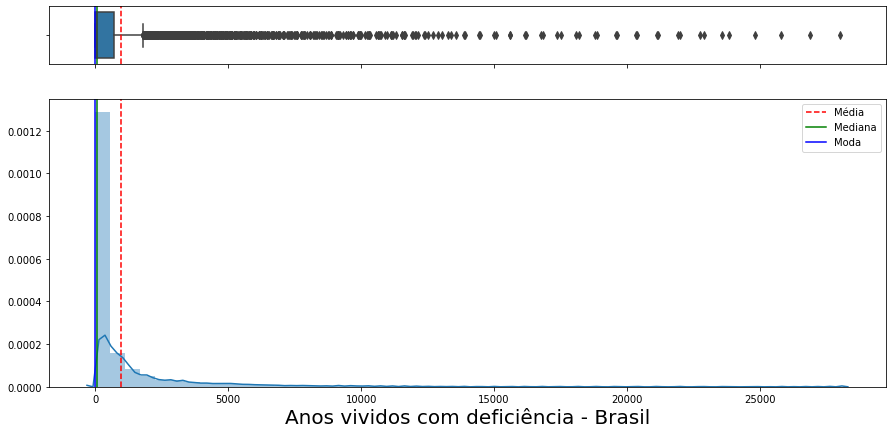

In [10]:
x = data[data['metric_name'] == 'Number'][['val']]

mean = x.mean()[0]
median = x.median()[0]
mode = x.mode()['val'][0]

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(15,7))
sns.boxplot(x, ax=ax_box)

ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(x, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Média':mean,'Mediana':median,'Moda':mode})

plt.xlabel("Anos vividos com deficiência - Brasil", fontsize=20)

ax_box.set(xlabel='')
plt.show()

<h3> Matriz de correlação para variáveis selecionadas</h3>

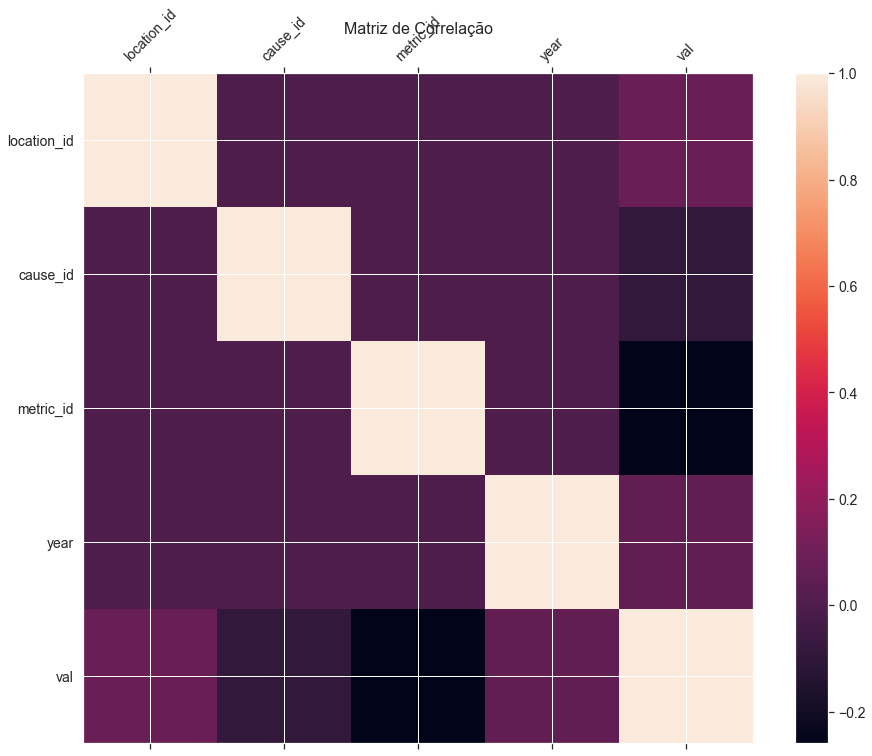

In [11]:
sns.set(style="darkgrid")
df = data[['location_id', 'cause_id', 'metric_id', 'year', 'val']]
f = plt.figure(figsize=(15, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de Correlação', fontsize=16);

<h3> Vamos verificar visualmente as medidas usando-se a métrica Number </h3>

Text(0, 0.5, 'Anos vividos com deficiência')

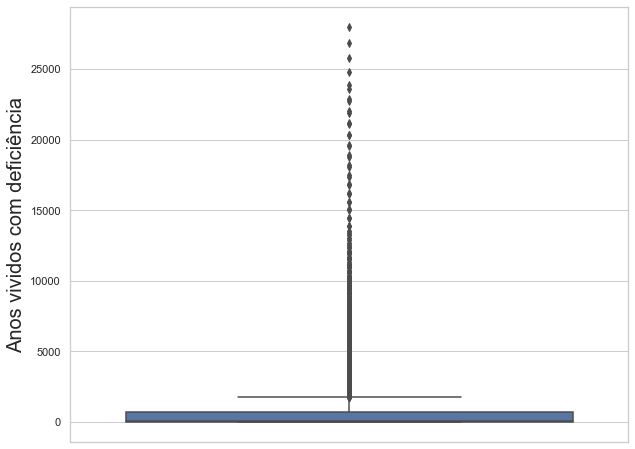

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='val', data=data[data['metric_name'] == 'Number'], orient="v")
plt.ylabel("Anos vividos com deficiência", fontsize=20)

Text(0, 0.5, 'Anos vividos com deficiência (%)')

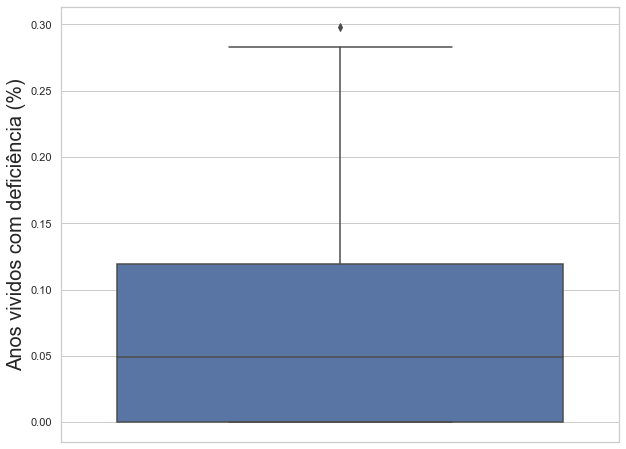

In [13]:
#sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='val', data=data[data['metric_name'] == 'Percent'], orient="v")
plt.ylabel("Anos vividos com deficiência (%)", fontsize=20)

Text(0, 0.5, 'Anos vividos com deficiência / 100.000 habitantes')

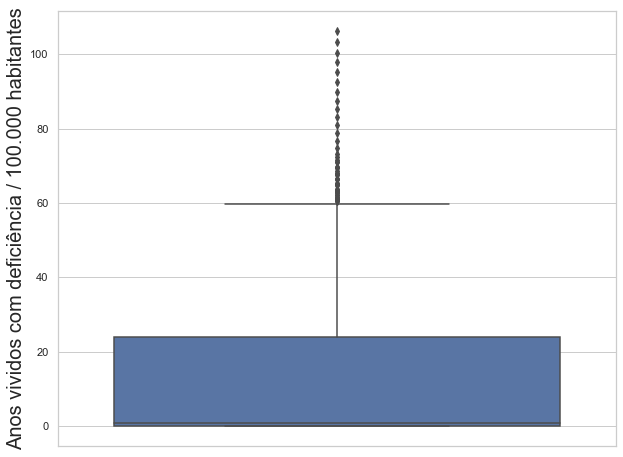

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='val', data=data[data['metric_name'] == 'Rate'], orient="v")
plt.ylabel("Anos vividos com deficiência / 100.000 habitantes", fontsize=20)

<h3>Histograma para verificar a distribuição dos dados por métrica</h3>

Text(0, 0.5, 'Contagem População')

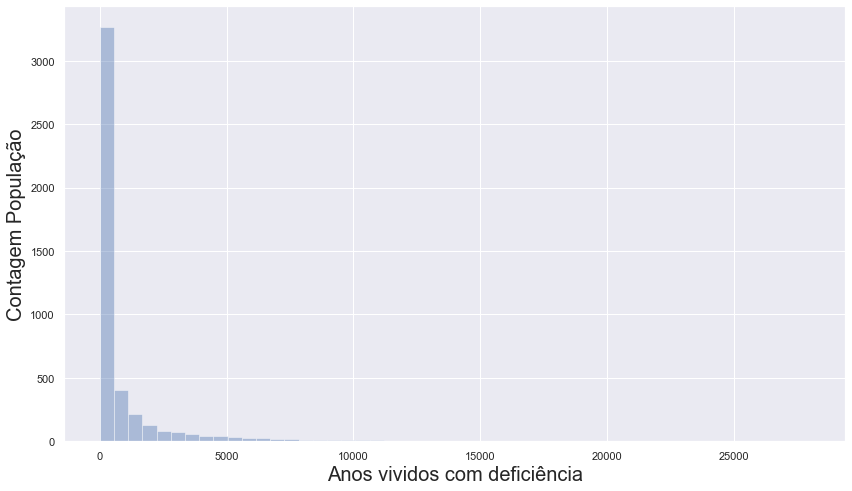

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(data[data['metric_name'] == 'Number']['val'], kde=False)
plt.xlabel("Anos vividos com deficiência", fontsize=20)
plt.ylabel("Contagem População", fontsize=20)

Text(0, 0.5, 'Contagem População')

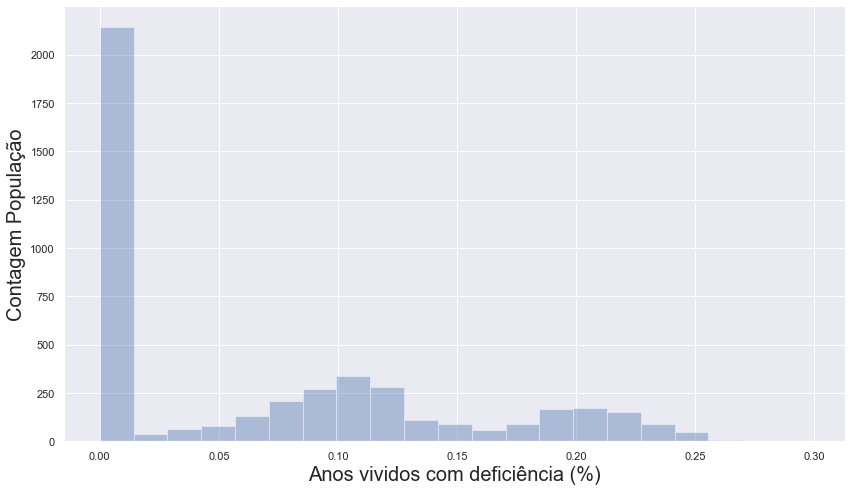

In [16]:
plt.figure(figsize=(14,8))
sns.distplot(data[data['metric_name'] == 'Percent']['val'], kde=False)
plt.xlabel("Anos vividos com deficiência (%)", fontsize=20)
plt.ylabel("Contagem População", fontsize=20)

Text(0, 0.5, 'Contagem População')

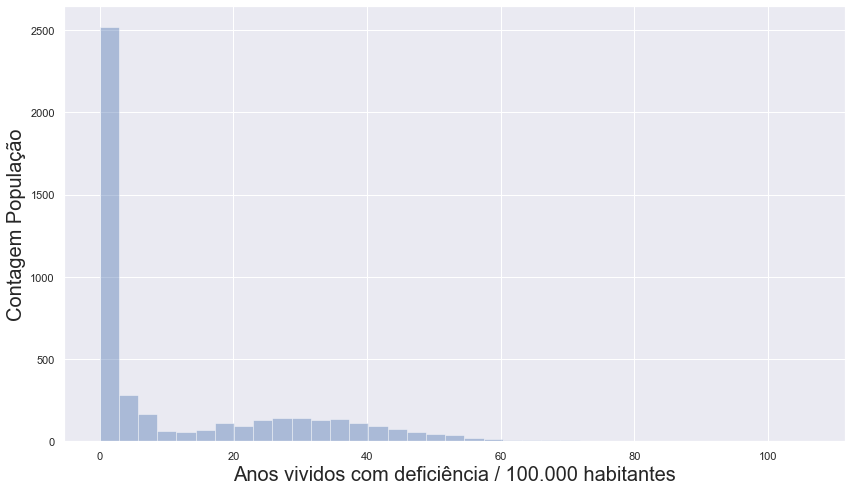

In [17]:
plt.figure(figsize=(14,8))
sns.distplot(data[data['metric_name'] == 'Rate']['val'], kde=False)
plt.xlabel("Anos vividos com deficiência / 100.000 habitantes", fontsize=20)
plt.ylabel("Contagem População", fontsize=20)

Em escala Logaritmica é melhor para visualizar

Text(0, 0.5, 'Contagem População')

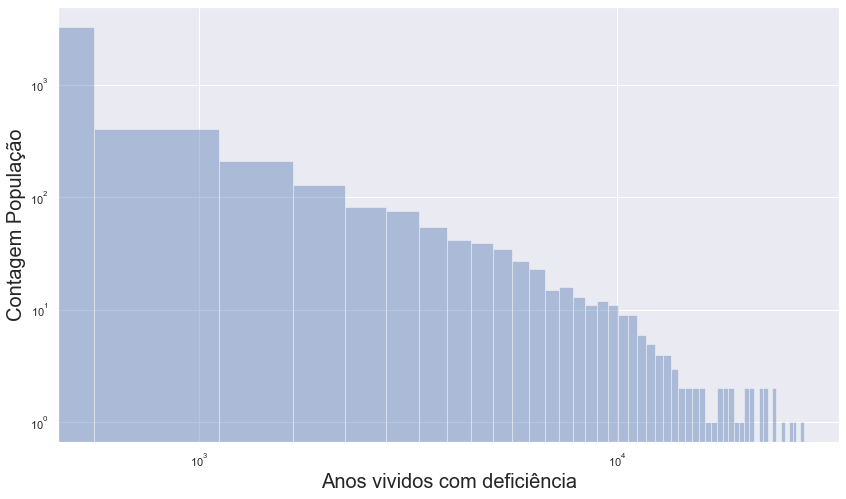

In [18]:
plt.figure(figsize=(14,8))
sns.distplot(data[data['metric_name'] == 'Number']['val'], kde=False)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Anos vividos com deficiência", fontsize=20)
plt.ylabel("Contagem População", fontsize=20)

Text(0, 0.5, 'Contagem População')

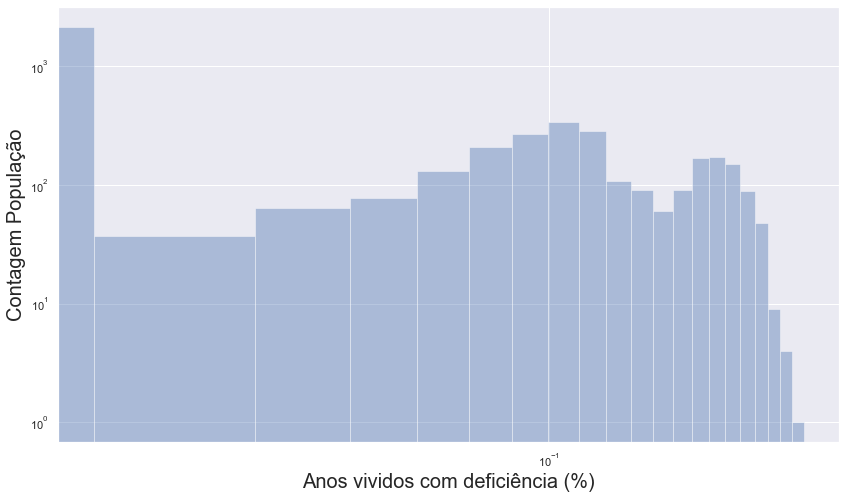

In [19]:
plt.figure(figsize=(14,8))
sns.distplot(data[data['metric_name'] == 'Percent']['val'], kde=False)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Anos vividos com deficiência (%)", fontsize=20)
plt.ylabel("Contagem População", fontsize=20)

Text(0, 0.5, 'Contagem População')

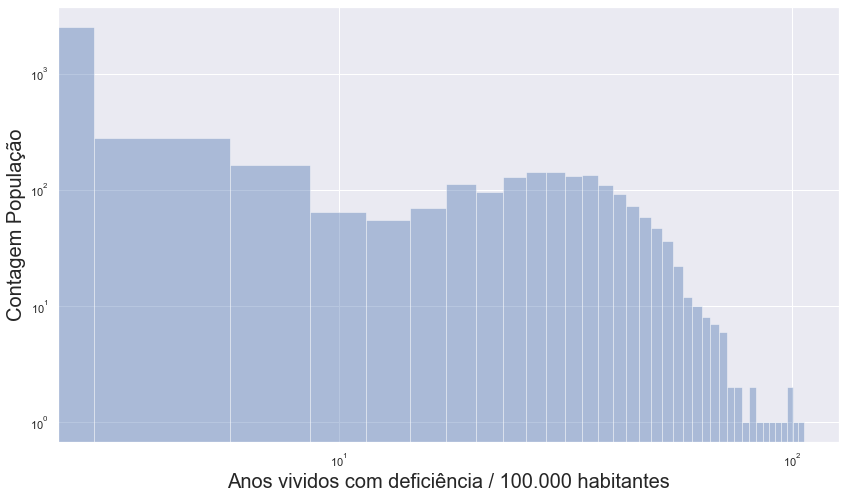

In [20]:
plt.figure(figsize=(14,8))
sns.distplot(data[data['metric_name'] == 'Rate']['val'], kde=False)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Anos vividos com deficiência / 100.000 habitantes", fontsize=20)
plt.ylabel("Contagem População", fontsize=20)

<h3>Distribuição por causa</h3>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Causa - Nome')

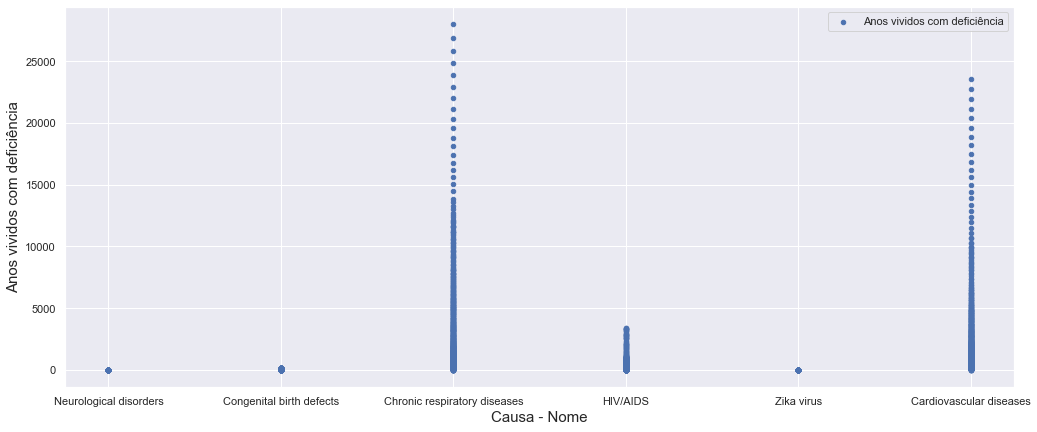

In [21]:
x = data[data['metric_name'] == 'Number'][['cause_name', 'val']]
x.plot.scatter(x='cause_name', y='val', label='Anos vividos com deficiência', figsize=(17,7))
plt.ylabel("Anos vividos com deficiência", fontsize=15)
plt.xlabel("Causa - Nome", fontsize=15)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Causa - Nome')

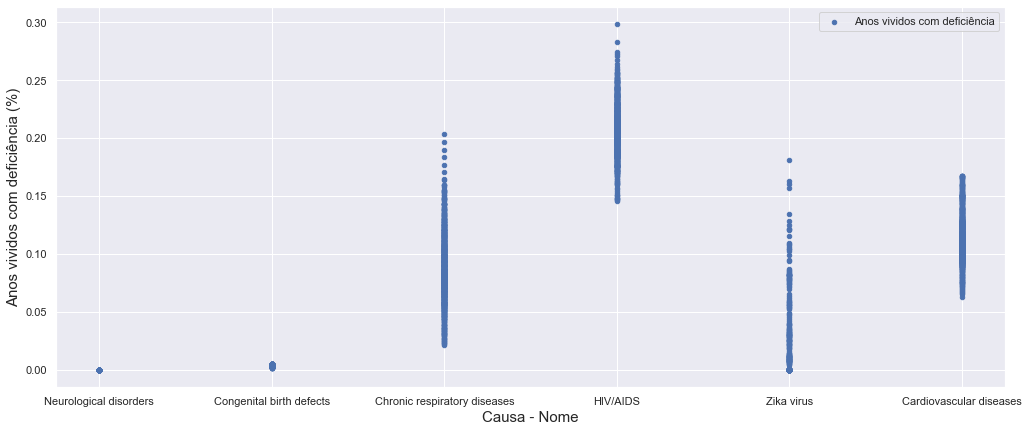

In [22]:
x = data[data['metric_name'] == 'Percent'][['cause_name', 'val']]
x.plot.scatter(x='cause_name', y='val', label='Anos vividos com deficiência', figsize=(17,7))
plt.ylabel("Anos vividos com deficiência (%)", fontsize=15)
plt.xlabel("Causa - Nome", fontsize=15)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Causa - Nome')

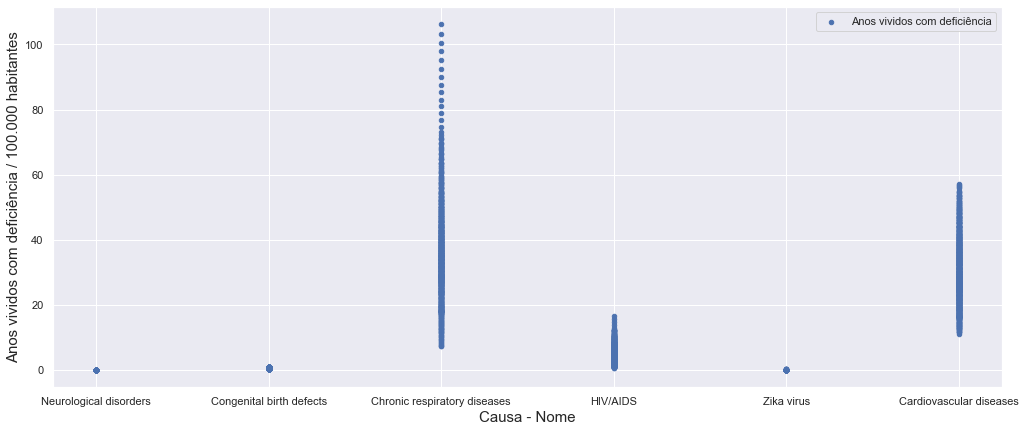

In [23]:
x = data[data['metric_name'] == 'Rate'][['cause_name', 'val']]
x.plot.scatter(x='cause_name', y='val', label='Anos vividos com deficiência', figsize=(17,7))
plt.ylabel("Anos vividos com deficiência / 100.000 habitantes", fontsize=15)
plt.xlabel("Causa - Nome", fontsize=15)

<h3>Série histórica de todos os anos - por métrica</h3>

Text(0.5, 0, 'Ano')

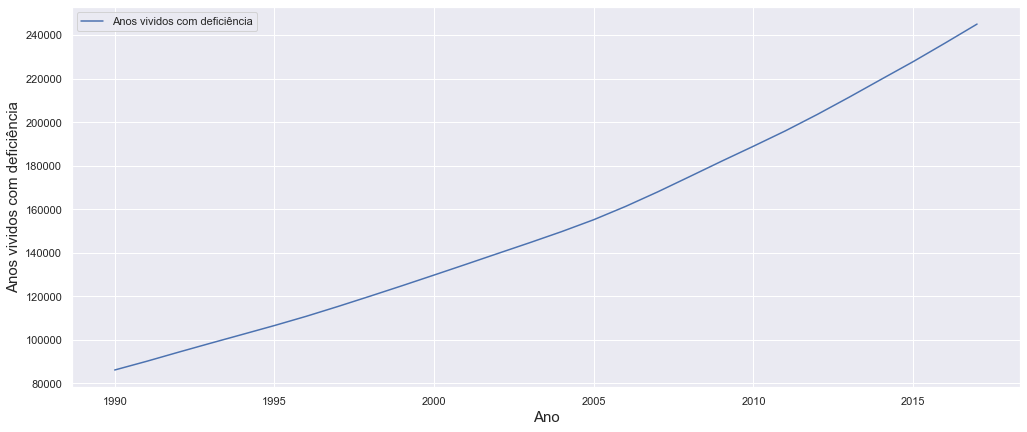

In [24]:
x = data[data['metric_name'] == 'Number'][['year', 'val']]
x = x.groupby(by='year').sum().reset_index()
x.set_index('year')
x.plot(x='year', y='val', label='Anos vividos com deficiência', figsize=(17,7))
plt.ylabel("Anos vividos com deficiência", fontsize=15)
plt.xlabel("Ano", fontsize=15)

Text(0.5, 0, 'Ano')

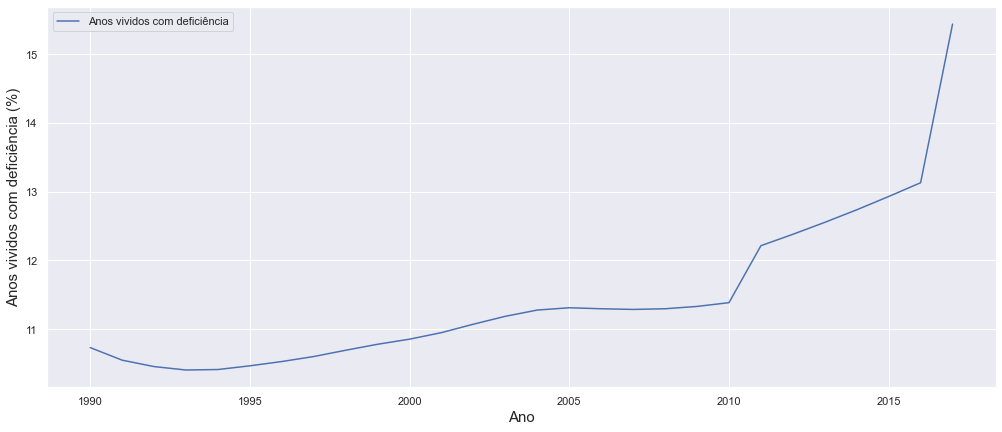

In [25]:
x = data[data['metric_name'] == 'Percent'][['year', 'val']]
x = x.groupby(by='year').sum().reset_index()
x.set_index('year')
x.plot(x='year', y='val', label='Anos vividos com deficiência', figsize=(17,7))
plt.ylabel("Anos vividos com deficiência (%)", fontsize=15)
plt.xlabel("Ano", fontsize=15)

Text(0.5, 0, 'Ano')

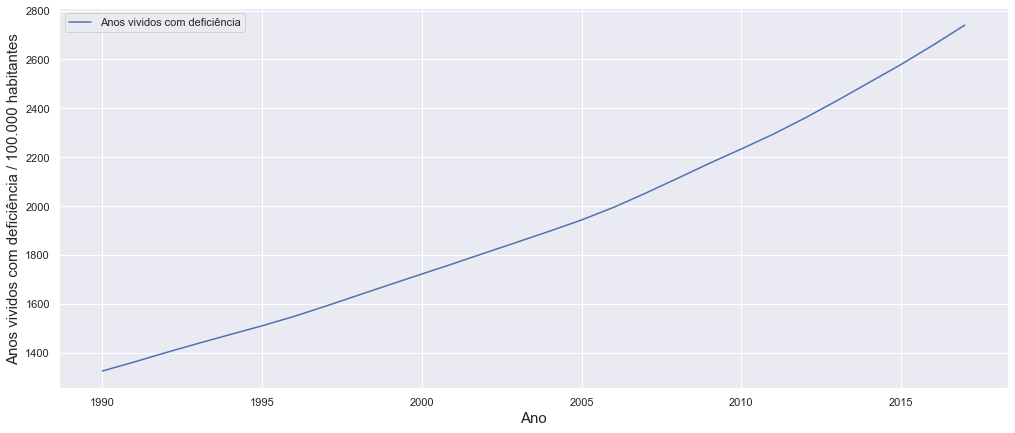

In [26]:
x = data[data['metric_name'] == 'Rate'][['year', 'val']]
x = x.groupby(by='year').sum().reset_index()
x.set_index('year')
x.plot(x='year', y='val', label='Anos vividos com deficiência', figsize=(17,7))
plt.ylabel("Anos vividos com deficiência / 100.000 habitantes", fontsize=15)
plt.xlabel("Ano", fontsize=15)

<h3> Vamos realizar a mesma análise por estado </h3>

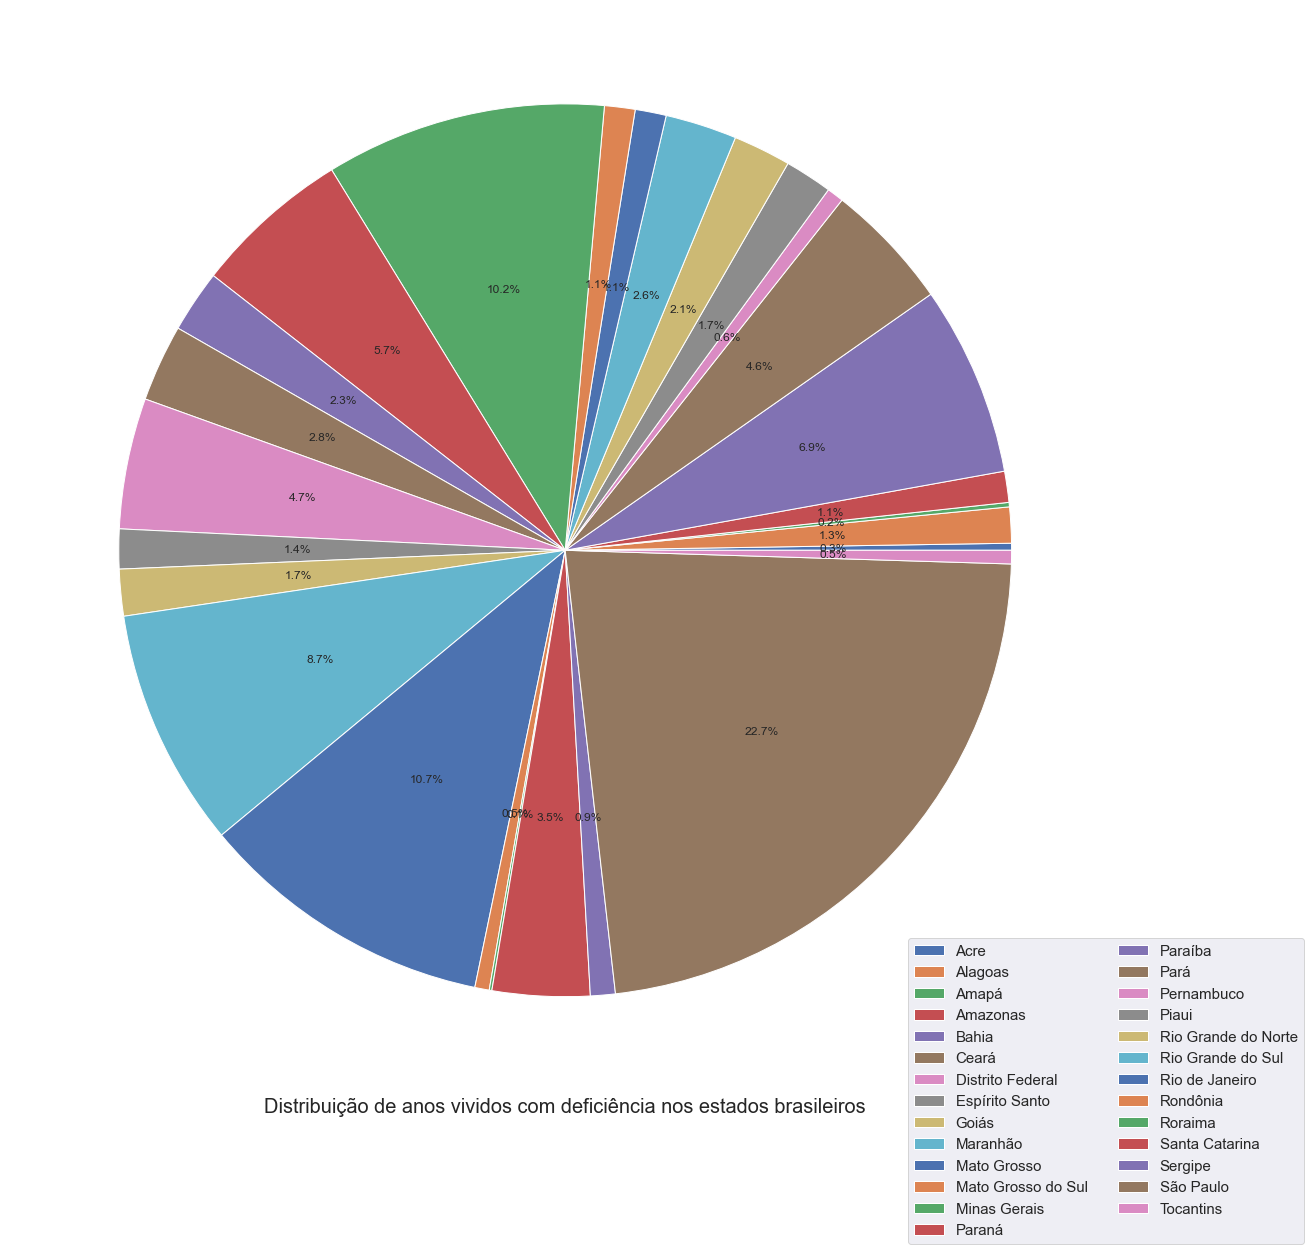

In [27]:
x = data[data['metric_name'] == 'Number'][['location_name', 'val']]
x = x.groupby(by='location_name').sum().reset_index()
p = pd.Series(x['val'].values, index=x['location_name'].values, name='')

plt.figure(figsize=(20,20))
plt.axis('equal');
#pie(x['val'], labels=x['location_name'], autopct='%1.1f%%');
plt.pie(x['val'], labels=None, autopct='%1.1f%%');
plt.ylabel("", fontsize=15)
plt.xlabel("Distribuição de anos vividos com deficiência nos estados brasileiros", fontsize=20)
plt.legend(x['location_name'], loc="best", bbox_to_anchor=(0.8, 0.15), ncol=2, prop={'size': 15})
plt.show()

<h3>Distribuição de outras variáveis</h3>

Text(0.5, 0, 'Doença')

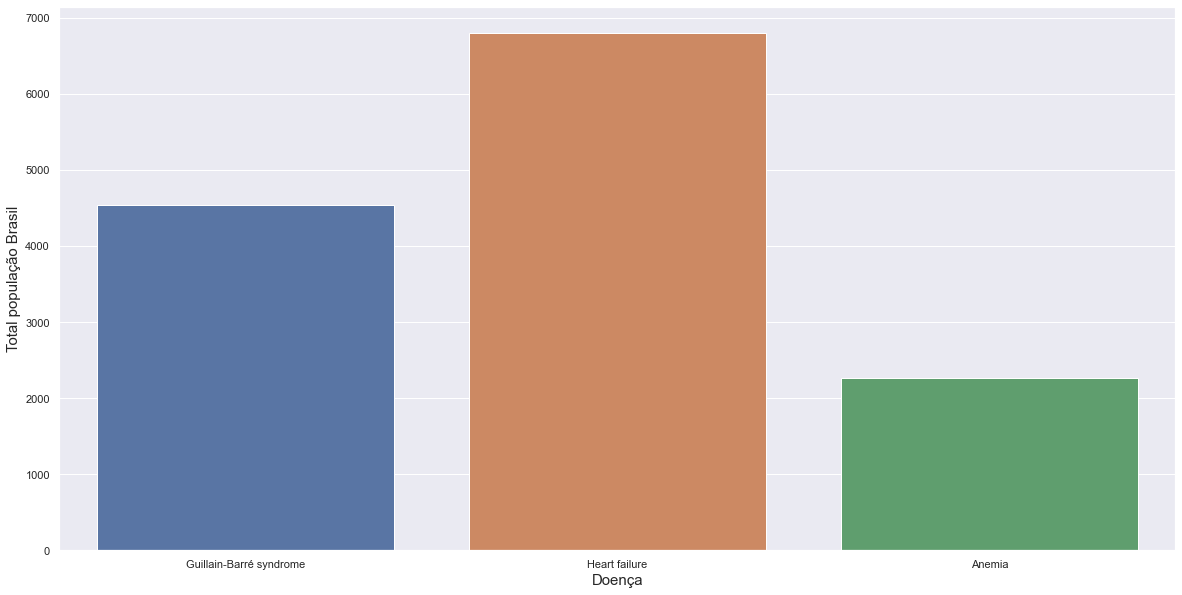

In [28]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='rei_name', data=data)
plt.ylabel("Total população Brasil", fontsize=15)
plt.xlabel("Doença", fontsize=15)

Text(0.5, 0, 'Causa nome')

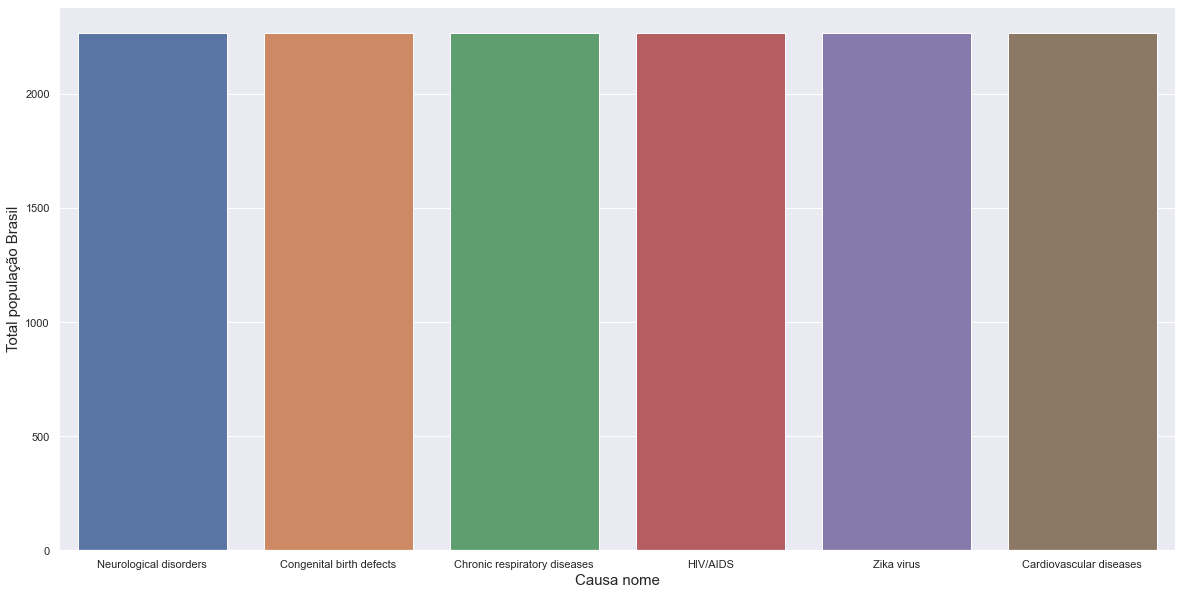

In [29]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='cause_name', data=data)
plt.ylabel("Total população Brasil", fontsize=15)
plt.xlabel("Causa nome", fontsize=15)

In [30]:
#x = data[data['metric_name'] == 'Number'][['location_name', 'val']]
#x = x.groupby(by='location_name').sum().reset_index()
#p = pd.Series(x['val'].values, index=x['location_name'].values, name='location_name')


#df2 = pd.DataFrame({'location_name' : p}, index = x['location_name'])
#df2.plot.pie(y='location_name', figsize=(20,20), autopct='%1.1f%%')
#plt.ylabel("", fontsize=15)
#plt.xlabel("Distribuição de anos vividos com deficiência nos estados brasileiros", fontsize=20)



In [31]:
#x = data[data['metric_name'] == 'Number'][['location_name', 'val']]
#x = x.groupby(by='location_name').sum().reset_index()
#p = pd.Series(x['val'].values, index=x['location_name'].values, name='')

#df2 = pd.DataFrame({'location_name': p},index = x['location_name'])
#df2.plot.pie(subplots=True, figsize=(15,15), autopct='%1.1f%%')

#x.plot.pie(figsize=(15,15), autopct='%1.1f%%')
